# Capstone #2 Notebook

In [68]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords 
import string
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

First, resize the dataset from 1,000,000 articles to 10,000 articles.

In [91]:
c_size = 100000

listofchunks = []
for chunk in pd.read_csv("sampled_data1.csv",chunksize=c_size, lineterminator='\n', index_col=[0]):
    print(chunk.shape)
    listofchunks.append(chunk)

(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)
(100000, 16)


In [3]:
df_concat = pd.concat(listofchunks)


In [4]:
df_concat.shape

(1000000, 16)

In [5]:
df_sampled = df_concat.sample(n=10000, random_state=0)

In [6]:
df_sampled.shape

(10000, 16)

In [7]:
df_sampled.to_csv('newly_sampled_data.csv', index=False)

In [8]:
df = pd.read_csv('newly_sampled_data.csv')

In [9]:
df.shape

(10000, 16)

In [10]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/mor...,"In President Obama ’s first term, the fiscal s...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and...","To have healthy economic growth, President Oba...",NaN,NaN,nytimes
1,4194551,dailykos.com,political,https://www.dailykos.com/stories/2017/5/15/166...,Brain trust\n\nPolitico has a story up about h...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Donald Trump still believes fake news because ...,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN,NaN,NaN,NaN
2,454455,beforeitsnews.com,fake,http://beforeitsnews.com/science-and-technolog...,Google HIPAA Compliance under Question in Cong...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Google HIPAA Compliance under Question in Cong...,Coup Media Group-Scitech,NaN,[''],NaN,NaN,NaN,NaN
3,5405677,anonhq.com,unreliable,http://anonhq.com/sesame-street-introduces-jul...,"To reduce the stigma associated with autism, S...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,"Sesame Street Introduces Julia, Its First Mupp...",Please Enter Your Name Here,NaN,[''],NaN,"Sesame Street, Autism",NaN,NaN
4,5821283,express.co.uk,rumor,https://www.express.co.uk/sport/football/26615...,ARSENAL 0 LIVERPOOL 2 []\n\nSamir Nasri impres...,2017-11-27T01:14:33.570665,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Arsenal 0 Liverpool 2: Emmanuel Frimpong sees red,Gary Jones For Express.Co.Uk,NaN,[''],ARSENAL 0 -- LIVERPOOL 2: LIVERPOOL recorded t...,NaN,NaN,NaN


In [11]:
df = df.rename_axis('document')

In [12]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source
document,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/mor...,"In President Obama ’s first term, the fiscal s...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and...","To have healthy economic growth, President Oba...",NaN,NaN,nytimes
1,4194551,dailykos.com,political,https://www.dailykos.com/stories/2017/5/15/166...,Brain trust\n\nPolitico has a story up about h...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Donald Trump still believes fake news because ...,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN,NaN,NaN,NaN
2,454455,beforeitsnews.com,fake,http://beforeitsnews.com/science-and-technolog...,Google HIPAA Compliance under Question in Cong...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Google HIPAA Compliance under Question in Cong...,Coup Media Group-Scitech,NaN,[''],NaN,NaN,NaN,NaN
3,5405677,anonhq.com,unreliable,http://anonhq.com/sesame-street-introduces-jul...,"To reduce the stigma associated with autism, S...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,"Sesame Street Introduces Julia, Its First Mupp...",Please Enter Your Name Here,NaN,[''],NaN,"Sesame Street, Autism",NaN,NaN
4,5821283,express.co.uk,rumor,https://www.express.co.uk/sport/football/26615...,ARSENAL 0 LIVERPOOL 2 []\n\nSamir Nasri impres...,2017-11-27T01:14:33.570665,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Arsenal 0 Liverpool 2: Emmanuel Frimpong sees red,Gary Jones For Express.Co.Uk,NaN,[''],ARSENAL 0 -- LIVERPOOL 2: LIVERPOOL recorded t...,NaN,NaN,NaN


There is little useful information in the columns 'Unnamed:', 'tags', 'summary', and 'source'. Drop these columns.

In [13]:
df.drop(['tags', 'summary', 'source'], axis=1)

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description
document,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/mor...,"In President Obama ’s first term, the fiscal s...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and...","To have healthy economic growth, President Oba..."
1,4194551,dailykos.com,political,https://www.dailykos.com/stories/2017/5/15/166...,Brain trust\n\nPolitico has a story up about h...,2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Donald Trump still believes fake news because ...,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN
2,454455,beforeitsnews.com,fake,http://beforeitsnews.com/science-and-technolog...,Google HIPAA Compliance under Question in Cong...,2018-01-25 20:13:50.426130,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Google HIPAA Compliance under Question in Cong...,Coup Media Group-Scitech,NaN,[''],NaN
3,5405677,anonhq.com,unreliable,http://anonhq.com/sesame-street-introduces-jul...,"To reduce the stigma associated with autism, S...",2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,"Sesame Street Introduces Julia, Its First Mupp...",Please Enter Your Name Here,NaN,[''],NaN
4,5821283,express.co.uk,rumor,https://www.express.co.uk/sport/football/26615...,ARSENAL 0 LIVERPOOL 2 []\n\nSamir Nasri impres...,2017-11-27T01:14:33.570665,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Arsenal 0 Liverpool 2: Emmanuel Frimpong sees red,Gary Jones For Express.Co.Uk,NaN,[''],ARSENAL 0 -- LIVERPOOL 2: LIVERPOOL recorded t...
5,6929803,beforeitsnews.com,fake,http://beforeitsnews.com/alternative/2016/01/a...,Ambassador Leo Emil Wanta Round Five with Kare...,2017-11-27T01:14:08.7454,2018-02-08 19:18:34.468038,2018-02-08 19:18:34.468066,Ambassador Leo Emil Wanta Round Five with Kare...,NaN,NaN,[''],NaN
6,2777976,dailykos.com,political,https://www.dailykos.com/stories/2012/08/24/11...,"Here at Daily Kos Elections, we're going to st...",2017-11-18T20:01:27.400599,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Daily Kos Elections race ratings changes: 8,"Backgroundurl Avatar_Large, Nickname, Joined, ...",NaN,[''],NaN
7,4219082,wikileaks.org,unreliable,https://wikileaks.org/plusd/cables/1975STATE00...,Tor\n\nTor is an encrypted anonymising network...,2017-11-27T01:15:37.733539,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Cable: 1975STATE006454,NaN,NaN,[''],NaN
8,8919447,nytimes.com,reliable,https://query.nytimes.com/gst/fullpage.html?re...,"DONENFELD--Arlene J. Actress, Administrator, A...",2018-02-11 00:40:18.858765,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"Paid Notice: Deaths DONENFELD, ARLENE J.",NaN,NaN,['DONENFELD ARLENE J.'],"DONENFELD--Arlene J. Actress, Administrator, A..."


What are the different types of fake news represented in the dataset?

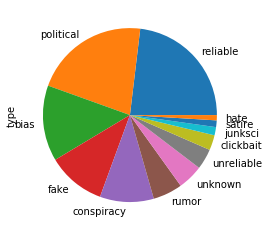

In [14]:
df.type.value_counts().plot(kind='pie')

Examine some 'content' values for the categories a little bit before delving into text analysis.

In [21]:
pd.set_option('display.max_colwidth', 1000)
print (df[df['type']=='fake']['content'].head())

document
2                                                                                                                                     Google HIPAA Compliance under Question in Congress\n\n% of readers think this story is Fact. Add your two cents.\n\nHeadline: Bitcoin & Blockchain Searches Exceed Trump! Blockchain Stocks Are Next!\n\nGoogle’s changing privacy terms and field of search may actually violate your healthcare information. Being signed into Google and searching health related search results can infringe on your privacy.\n\nBoycott Google, Try Gibiru.com: Uncensored Anonymous Search\n\nDifferent media sources reported that members of Congress have express reservations about Google’s new privacy policy. House member has been caught saying that Google’s handling of sensitive medical searches may violate HIPAA (Health Insurance Portability and Accountability Act.)\n\nRead Full Story: Google HIPAA Compliance under Question in Congress\n\nRead more at Coup Media Group-SciT

In [22]:
print (df[df['type']=='reliable']['content'].head())

document
0     In President Obama ’s first term, the fiscal stimulus and the auto-industry rescue of 2009 created and preserved millions of jobs. But the stimulus ended years ago, replaced with temporary measures that have been insufficient to propel the economy forward. Health care reform in 2010 was a major step in the effort to support the middle class, but its broad effects will be felt only in the years and decades to come.\n\nIn recent years, the administration and Congress have been consumed with deficit reduction, which is antithetical to job creation because it curbs government spending when the economy is weak. Unless Mr. Obama can shift policy away from premature austerity and toward ways to bolster demand and foster investment, job growth will remain sluggish and unemployment high.\n\nWhat has been missing for years is a forceful labor agenda — one that calls for more jobs, but also has as its goal rising wages coupled with robust hiring.\n\nMr. Obama can take an important 

The typology of different kinds of fake news is an interesting issue in this dataset.  Can a model classifier accurately predict the different kinds of fake news?  Is it better just to put all of the different kinds of fake news under one label?  The analysis will examine these issues.

## Analysis

## **Preprocessing**

**Convert text to lowercase.**

In [29]:
df['content'] = df['content'].str.lower()


**Tokenize the article text in the dataset.**

In [30]:
df['tokenized_content'] = df.apply(lambda row: nltk.word_tokenize(row["content"]), axis=1)

In [31]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content
document,,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/more-jobs-higher-pay-in-obamas-second-term.html,"in president obama ’s first term, the fiscal stimulus and the auto-industry rescue of 2009 created and preserved millions of jobs. but the stimulus ended years ago, replaced with temporary measures that have been insufficient to propel the economy forward. health care reform in 2010 was a major step in the effort to support the middle class, but its broad effects will be felt only in the years and decades to come.\n\nin recent years, the administration and congress have been consumed with deficit reduction, which is antithetical to job creation because it curbs government spending when the economy is weak. unless mr. obama can shift policy away from premature austerity and toward ways to bolster demand and foster investment, job growth will remain sluggish and unemployment high.\n\nwhat has been missing for years is a forceful labor agenda — one that calls for more jobs, but also has as its goal rising wages coupled with robust hiring.\n\nmr. obama can take an important step in tha...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and Salaries', 'United States Economy', 'Organized Labor', 'Series', 'Editorials', 'Second Term The (Series)']","To have healthy economic growth, President Obama needs to elevate labor issues in his second term.",NaN,NaN,nytimes,"[in, president, obama, ’, s, first, term, ,, the, fiscal, stimulus, and, the, auto-industry, rescue, of, 2009, created, and, preserved, millions, of, jobs, ., but, the, stimulus, ended, years, ago, ,, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, ., health, care, reform, in, 2010, was, a, major, step, in, the, effort, to, support, the, middle, class, ,, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, ., in, recent, years, ,, the, administration, and, congress, have, been, consumed, with, deficit, reduction, ,, which, is, antithetical, to, job, creation, ...]"
1,4194551,dailykos.com,political,https://www.dailykos.com/stories/2017/5/15/1662460/-Donald-Trump-still-believes-fake-news-because-he-is-surrounded-by-morons,"brain trust\n\npolitico has a story up about how part-time white house resident donald trump keeps getting fake news delivered to him despite having, at least in theory, access to the most elaborate intelligence-gathering mechanisms the world has to offer. the anecdote it leads with, though, pretty much sums it up.\n\njust days earlier, k.t. mcfarland, the deputy national security adviser, had given trump a printout of two time magazine covers. one, supposedly from the 1970s, warned of a coming ice age; the other, from 2008, about surviving global warming, according to four white house officials familiar with the matter. trump quickly got lathered up about the media’s hypocrisy. but there was a problem. the 1970s cover was fake, part of an internet hoax that’s circulated for years. staff chased down the truth and intervened before trump tweeted or talked publicly about it.\n\nall right, full stop—the deputy national security adviser, in an effort to bend trump's brain to her own ag...",2017-11-27T01:14:21.395055,2018-02-07 23:39:33.852671,2018-02-07 23:39:33.852696,Donald Trump still believes fake news because he is surrounded by morons,"Backgroundurl Avatar_Large, Nickname, Joined, Created_At, Story Count, N_Stories, Comment Count, N_Comments, Popular Tags, Showtags Popular_Tags",NaN,[''],NaN,NaN,NaN,NaN,"[brain, trust, politico, has, a, story, up, about, how, part-time, white, house, resident, donald, trump, keeps, getting, fake, news, delivered, to, him, despi

**Remove punctuation from tokenized documents**

In [44]:
punctuation = string.punctuation


In [47]:
def remove_punc(row):
    tokens = row['tokenized_content']
    newtokens = [w for w in tokens if w.isalpha()]
    newtokens = [w for w in newtokens if w not in punctuation]
    return newtokens

df['no_punc_content'] = df.apply(remove_punc, axis=1)

In [48]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,cleaned_content,no_punc_content
document,,,,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/more-jobs-higher-pay-in-obamas-second-term.html,"in president obama ’s first term, the fiscal stimulus and the auto-industry rescue of 2009 created and preserved millions of jobs. but the stimulus ended years ago, replaced with temporary measures that have been insufficient to propel the economy forward. health care reform in 2010 was a major step in the effort to support the middle class, but its broad effects will be felt only in the years and decades to come.\n\nin recent years, the administration and congress have been consumed with deficit reduction, which is antithetical to job creation because it curbs government spending when the economy is weak. unless mr. obama can shift policy away from premature austerity and toward ways to bolster demand and foster investment, job growth will remain sluggish and unemployment high.\n\nwhat has been missing for years is a forceful labor agenda — one that calls for more jobs, but also has as its goal rising wages coupled with robust hiring.\n\nmr. obama can take an important step in tha...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and Salaries', 'United States Economy', 'Organized Labor', 'Series', 'Editorials', 'Second Term The (Series)']","To have healthy economic growth, President Obama needs to elevate labor issues in his second term.",NaN,NaN,nytimes,"[in, president, obama, ’, s, first, term, ,, the, fiscal, stimulus, and, the, auto-industry, rescue, of, 2009, created, and, preserved, millions, of, jobs, ., but, the, stimulus, ended, years, ago, ,, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, ., health, care, reform, in, 2010, was, a, major, step, in, the, effort, to, support, the, middle, class, ,, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, ., in, recent, years, ,, the, administration, and, congress, have, been, consumed, with, deficit, reduction, ,, which, is, antithetical, to, job, creation, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]"
1,4194551,dailykos.com,political,https://www.dailykos.com/stories/2017/5/15/1662460/-Donald-Trump-still-believes-fake-news-because-he-is-surrounded-by-morons,"brain trust\n\npolitico has a story up about how part-tim

**Apply stemming to tokens.**

In [51]:
ps = PorterStemmer()


In [52]:
def stemmed_content(row):
    content = row['no_punc_content']
    stemmed_list = [ps.stem(word) for word in content]
    return (stemmed_list)

df['stemmed_words'] = df.apply(stemmed_content, axis=1)

In [53]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary,source,tokenized_content,cleaned_content,no_punc_content,stemmed_words
document,,,,,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/more-jobs-higher-pay-in-obamas-second-term.html,"in president obama ’s first term, the fiscal stimulus and the auto-industry rescue of 2009 created and preserved millions of jobs. but the stimulus ended years ago, replaced with temporary measures that have been insufficient to propel the economy forward. health care reform in 2010 was a major step in the effort to support the middle class, but its broad effects will be felt only in the years and decades to come.\n\nin recent years, the administration and congress have been consumed with deficit reduction, which is antithetical to job creation because it curbs government spending when the economy is weak. unless mr. obama can shift policy away from premature austerity and toward ways to bolster demand and foster investment, job growth will remain sluggish and unemployment high.\n\nwhat has been missing for years is a forceful labor agenda — one that calls for more jobs, but also has as its goal rising wages coupled with robust hiring.\n\nmr. obama can take an important step in tha...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,NaN,"['Obama Barack', 'Labor and Jobs', 'Wages and Salaries', 'United States Economy', 'Organized Labor', 'Series', 'Editorials', 'Second Term The (Series)']","To have healthy economic growth, President Obama needs to elevate labor issues in his second term.",NaN,NaN,nytimes,"[in, president, obama, ’, s, first, term, ,, the, fiscal, stimulus, and, the, auto-industry, rescue, of, 2009, created, and, preserved, millions, of, jobs, ., but, the, stimulus, ended, years, ago, ,, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, ., health, care, reform, in, 2010, was, a, major, step, in, the, effort, to, support, the, middle, class, ,, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, ., in, recent, years, ,, the, administration, and, congress, have, been, consumed, with, deficit, reduction, ,, which, is, antithetical, to, job, creation, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, presid, obama, s, first, term, the, fiscal, stimulu, and, the, rescu, of, creat, and, preserv, million, of, job, but, the, stimulu, end, year, ago, replac, with, temporari, measur, that, have, be

**Remove stop words**

In [54]:
english_stopwords = set(stopwords.words('english'))


def remove_stop(row):
    tokens = row['stemmed_words']
    newtokens = [w for w in tokens if w not in english_stopwords]
    return newtokens

df['no_stop_stemmed'] = df.apply(remove_stop, axis=1)



In [55]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,...,meta_keywords,meta_description,tags,summary,source,tokenized_content,cleaned_content,no_punc_content,stemmed_words,no_stop_stemmed
document,,,,,,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/more-jobs-higher-pay-in-obamas-second-term.html,"in president obama ’s first term, the fiscal stimulus and the auto-industry rescue of 2009 created and preserved millions of jobs. but the stimulus ended years ago, replaced with temporary measures that have been insufficient to propel the economy forward. health care reform in 2010 was a major step in the effort to support the middle class, but its broad effects will be felt only in the years and decades to come.\n\nin recent years, the administration and congress have been consumed with deficit reduction, which is antithetical to job creation because it curbs government spending when the economy is weak. unless mr. obama can shift policy away from premature austerity and toward ways to bolster demand and foster investment, job growth will remain sluggish and unemployment high.\n\nwhat has been missing for years is a forceful labor agenda — one that calls for more jobs, but also has as its goal rising wages coupled with robust hiring.\n\nmr. obama can take an important step in tha...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,...,"['Obama Barack', 'Labor and Jobs', 'Wages and Salaries', 'United States Economy', 'Organized Labor', 'Series', 'Editorials', 'Second Term The (Series)']","To have healthy economic growth, President Obama needs to elevate labor issues in his second term.",NaN,NaN,nytimes,"[in, president, obama, ’, s, first, term, ,, the, fiscal, stimulus, and, the, auto-industry, rescue, of, 2009, created, and, preserved, millions, of, jobs, ., but, the, stimulus, ended, years, ago, ,, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, ., health, care, reform, in, 2010, was, a, major, step, in, the, effort, to, support, the, middle, class, ,, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, ., in, recent, years, ,, the, administration, and, congress, have, been, consumed, with, deficit, reduction, ,, which, is, antithetical, to, job, creation, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, presid, obama, s, first, term, the, fiscal, stimulu, and, the, rescu, of, creat, and, preserv, million, of, job, but, the, stimulu, end, year, ago, replac, with, temporari, measur, th

Save preprocessed data to .csv just in case.

In [56]:
df.to_csv('fake_news_preprocessed.csv', index=False)


## Classification ##

**1. Create Count Vectorizer**

Rejoin lists of words in the 'no_stop_stemmed' column.

In [59]:
def rejoin(row):
    my_list = row['no_stop_stemmed']
    joined_text = ( " ".join(my_list))
    return joined_text

df['pre_processed_text'] = df.apply(rejoin, axis=1)

In [60]:
df.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,...,meta_description,tags,summary,source,tokenized_content,cleaned_content,no_punc_content,stemmed_words,no_stop_stemmed,pre_processed_text
document,,,,,,,,,,,,,,,,,,,,,
0,9550339,nytimes.com,reliable,https://www.nytimes.com/2013/02/05/opinion/more-jobs-higher-pay-in-obamas-second-term.html,"in president obama ’s first term, the fiscal stimulus and the auto-industry rescue of 2009 created and preserved millions of jobs. but the stimulus ended years ago, replaced with temporary measures that have been insufficient to propel the economy forward. health care reform in 2010 was a major step in the effort to support the middle class, but its broad effects will be felt only in the years and decades to come.\n\nin recent years, the administration and congress have been consumed with deficit reduction, which is antithetical to job creation because it curbs government spending when the economy is weak. unless mr. obama can shift policy away from premature austerity and toward ways to bolster demand and foster investment, job growth will remain sluggish and unemployment high.\n\nwhat has been missing for years is a forceful labor agenda — one that calls for more jobs, but also has as its goal rising wages coupled with robust hiring.\n\nmr. obama can take an important step in tha...",2018-02-11 00:46:36.265848,2018-02-11 00:14:20.346838,2018-02-11 00:14:20.346871,"More Jobs, Higher Pay",NaN,...,"To have healthy economic growth, President Obama needs to elevate labor issues in his second term.",NaN,NaN,nytimes,"[in, president, obama, ’, s, first, term, ,, the, fiscal, stimulus, and, the, auto-industry, rescue, of, 2009, created, and, preserved, millions, of, jobs, ., but, the, stimulus, ended, years, ago, ,, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, ., health, care, reform, in, 2010, was, a, major, step, in, the, effort, to, support, the, middle, class, ,, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, ., in, recent, years, ,, the, administration, and, congress, have, been, consumed, with, deficit, reduction, ,, which, is, antithetical, to, job, creation, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, president, obama, s, first, term, the, fiscal, stimulus, and, the, rescue, of, created, and, preserved, millions, of, jobs, but, the, stimulus, ended, years, ago, replaced, with, temporary, measures, that, have, been, insufficient, to, propel, the, economy, forward, health, care, reform, in, was, a, major, step, in, the, effort, to, support, the, middle, class, but, its, broad, effects, will, be, felt, only, in, the, years, and, decades, to, come, in, recent, years, the, administration, and, congress, have, been, consumed, with, deficit, reduction, which, is, antithetical, to, job, creation, because, it, curbs, government, spending, when, the, economy, is, weak, unless, obama, ...]","[in, presid, obama, s, first, term, the, fiscal, stimulu, and, the, rescu, of, creat, and, preserv, million, of, job, but, the, stimulu, end, year, ago, replac, with, temporari, measur, that, have, been, insuffici, to, propel, the, economi, forward, health, care, reform, in, wa, a, major, step, in, the, effort, to, support, the, middl, 

In [72]:
df.type.unique()

array(['reliable', 'political', 'fake', 'unreliable', 'rumor', 'bias',
       'conspiracy', 'unknown', 'clickbait', nan, 'hate', 'junksci',
       'satire'], dtype=object)

In [78]:
df = df.dropna(subset=['type'])

In [79]:
df.type.unique()

array(['reliable', 'political', 'fake', 'unreliable', 'rumor', 'bias',
       'conspiracy', 'unknown', 'clickbait', 'hate', 'junksci', 'satire'],
      dtype=object)

In [80]:
y = df.type


In [81]:
X_train, X_test, y_train, y_test = train_test_split(df['pre_processed_text'], y, test_size=0.33, random_state=53)

In [82]:
count_vectorizer = CountVectorizer(stop_words='english')


In [83]:
count_train = count_vectorizer.fit_transform(X_train)


In [84]:
count_test = count_vectorizer.transform(X_test)


In [85]:
print(count_vectorizer.get_feature_names()[:1000])


['aa', 'aaa', 'aaaaah', 'aaaah', 'aaah', 'aaargh', 'aaberg', 'aabo', 'aact', 'aam', 'aamer', 'aan', 'aanbreken', 'aangaan', 'aangenomen', 'aankhen', 'aanyc', 'aapl', 'aaraujo', 'aard', 'aari', 'aaron', 'aaronbastani', 'aaronrbowen', 'aarp', 'aat', 'aavp', 'ab', 'aba', 'abaaoud', 'aback', 'abacu', 'abad', 'abajo', 'abandon', 'abat', 'abattoir', 'abaya', 'abb', 'abba', 'abbau', 'abbey', 'abbi', 'abbiamo', 'abbot', 'abbott', 'abbottabad', 'abbrevi', 'abc', 'abcnew', 'abcpolit', 'abd', 'abdaladz', 'abdalhamid', 'abdallah', 'abdalrhman', 'abdel', 'abdelaziz', 'abdelbaset', 'abdellatif', 'abdelslam', 'abdeslam', 'abdi', 'abdic', 'abdict', 'abdifatah', 'abdirizak', 'abdomen', 'abdomin', 'abdubakir', 'abduboi', 'abduct', 'abducte', 'abductor', 'abdul', 'abdulahi', 'abdulaziz', 'abdullaev', 'abdullah', 'abdullamatullah', 'abdullayeva', 'abdulleh', 'abdulmutallab', 'abdulrahman', 'abdumajid', 'abdurahman', 'abdushakir', 'abdussamatov', 'abe', 'abech', 'abecitru', 'abedi', 'abedin', 'abedini', 'a

**Train and test the model**

In [86]:
nb_classifier = MultinomialNB()


In [87]:
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)


In [88]:
score = metrics.accuracy_score(y_test, pred)
print(score)


0.5717011128775835


In [90]:
cm = metrics.confusion_matrix(y_test, pred, labels=['reliable', 'political', 'fake', 'unreliable', 'rumor', 'bias',
       'conspiracy', 'unknown', 'clickbait', 'hate', 'junksci', 'satire'])
print(cm)

[[602  97  15   0   6  17   5   1   0   0   0   0]
 [ 82 497  28   0   0  32  11   1   0   0   0   0]
 [ 56 103 169   0   0   7  21   0   0   0   1   0]
 [ 11  23   9  80   0   8   9   1   0   0   0   0]
 [ 70  25   8   0  69   2   3   0   0   0   0   0]
 [ 45 132  16   0   1 209  13   4   0   0   1   0]
 [ 31  96  27   0   0  23 134   0   0   0   0   0]
 [ 20  49  14   0   0  15  10  26   0   0   0   0]
 [ 21  53   5   0   0   4   4   0   2   0   0   0]
 [  9  20   0   0   1   1   2   0   0   0   0   0]
 [  7   4  19   0   0   0  11   1   0   0  10   0]
 [ 21  11   4   0   0   0   0   0   0   0   0   0]]


Multinomial Naive Bayes with 57% accuracy can predict whether a given article belongs to the 'reliable', 'political', 'fake', 'unreliable', 'rumor', 'bias', 'conspiracy', 'unknown', 'clickbait', 'hate', 'junksci', 'satire' categories in the dataset.

to be continued....